## Obtener el Espectrograma de Mel

In [1]:
import os

import torch
import pandas as pd
import torchaudio
import math

import matplotlib.pyplot as plt
import numpy as np
from ipynb.fs.defs.train_Eval import create_data_loader
from ipynb.fs.defs.dataset import Data_set, AUDIO_DIR, ANNOTATIONS_FILE, SAMPLE_RATE, NUM_SAMPLES

import csv
from playsound import playsound

import torchshow as ts

In [2]:
BATCH_SIZE = 100

class_mapping = [
    "air_conditioner",
    "car_horn",
    "children_playing",
    "dog_bark",
    "drilling",
    "engine_idling",
    "gun_shot",
    "jackhammer",
    "siren",
    "street_music"]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

Using cuda


In [3]:
def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()
    
def dirct_audio (ant_file, index):
    with open(ant_file) as archivo:
        datacsv = csv.reader(archivo)
        datacsv = list(datacsv)
        audio_label = datacsv[index][0]
        audio_folder = datacsv[index][5]
        audio_dir = AUDIO_DIR+'/fold'+str(audio_folder)+'/'+str(audio_label)
    
    return audio_dir

def prueba_indv(ant_file, dataloader, classes, data, bl_data):
    
    rnd_sample_idx = np.random.randint(len(dataloader))
    if bl_data == True:
        rnd_sample_idx = data
        
    index = rnd_sample_idx - 1
    etiqueta = classes[dataloader[index][1]]
    print(f'La imagen de muestra representa a: {etiqueta}')
    
    image = dataloader[index][0]
    image = (image - image.min()) / (image.max() -image.min() )
    image = image.to('cpu')
    plot_figure(image)
    print(rnd_sample_idx)
    
    #audio_dir = dirct_audio (ant_file, rnd_sample_idx)
    #playsound(audio_dir)
    return image, etiqueta
    

In [4]:
# n_fft = int(math.pow(2,7))
# hop_length = int(n_fft * 0.85) # Salto de un 25%
# n_mels = 128      # Notas en el piano DOCUMENTACIÓN

n_fft = int(math.pow(2,10))
hop_length = int(n_fft*.25)
n_mels = int(88*1.31)


mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate=SAMPLE_RATE,
                                                       n_fft=n_fft, hop_length=hop_length,
                                                       n_mels=n_mels)

dts= Data_set(ANNOTATIONS_FILE,
                   AUDIO_DIR,
                   mel_spectrogram,
                   SAMPLE_RATE,
                   NUM_SAMPLES,
                   device)

data_loader = create_data_loader(dts, BATCH_SIZE)

La imagen de muestra representa a: children_playing


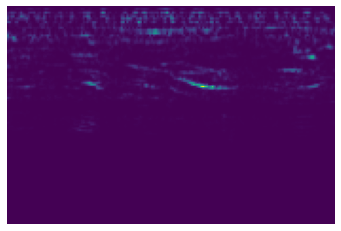

3548


In [174]:
clase = 671

img, etq = prueba_indv(ANNOTATIONS_FILE, dts, class_mapping, clase, False)

In [175]:
ts.save(img, 'MelSpec_'+etq+'_3.png')